# Quickstart
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TheRedElement/LStein/blob/main/demo/quickstart.ipynb)

If you run this notebook in [google colab](https://colab.google/), you should not need to install anything else.
You might, however, need to restart your session to have the required versions of [matplotlib](https://matplotlib.org/), [numpy](https://numpy.org/), [Plotly](https://plotly.com/python/) ready.

In [1]:
#in case you are in colab
import sys
IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    !pip3 install git+https://github.com/TheRedElement/LStein.git

In [2]:
#%%imports
import importlib
import numpy as np
import polars as pl

from lstein import (
    utils as lsu,
    makedata as md
)
from lstein import lstein
importlib.reload(lstein)


<module 'lstein.lstein' from '/home/lukas/github/LStein/src/lstein/lstein.py'>

In [3]:
#generate some data
raw, pro = md.simulate(5, opt="sin")
df_raw = pl.from_dict(raw).sample(2000).sort("period", "time") #subsample to get random sequence lengths 
df_pro = pl.from_dict(pro).sample(1800).sort("period", "time") #subsample to get random sequence lengths
print(df_raw)

shape: (2_000, 5)
┌────────┬────────────┬───────────┬─────────────┬────────────┐
│ period ┆ time       ┆ amplitude ┆ amplitude_e ┆ processing │
│ ---    ┆ ---        ┆ ---       ┆ ---         ┆ ---        │
│ f64    ┆ f64        ┆ f64       ┆ f64         ┆ str        │
╞════════╪════════════╪═══════════╪═════════════╪════════════╡
│ 10.2   ┆ -50.0      ┆ 0.82209   ┆ NaN         ┆ raw        │
│ 10.2   ┆ -50.0      ┆ 1.427031  ┆ NaN         ┆ raw        │
│ 10.2   ┆ -50.0      ┆ 0.545123  ┆ NaN         ┆ raw        │
│ 10.2   ┆ -49.098196 ┆ 1.437407  ┆ NaN         ┆ raw        │
│ 10.2   ┆ -49.098196 ┆ 1.310625  ┆ NaN         ┆ raw        │
│ …      ┆ …          ┆ …         ┆ …           ┆ …          │
│ 35.8   ┆ 98.797595  ┆ -0.641037 ┆ NaN         ┆ raw        │
│ 35.8   ┆ 99.098196  ┆ -1.379858 ┆ NaN         ┆ raw        │
│ 35.8   ┆ 99.398798  ┆ -0.967096 ┆ NaN         ┆ raw        │
│ 35.8   ┆ 99.699399  ┆ -0.812731 ┆ NaN         ┆ raw        │
│ 35.8   ┆ 100.0      ┆ -1.202251 ┆ N

In [4]:
#get dimensions
##raw
df_raw_p = df_raw.partition_by("period")    #partition by unique values in `"period"`
theta_raw = [df["period"].to_numpy()[0] for df in df_raw_p]    #only one value per series
x_raw = [df["time"].to_numpy() for df in df_raw_p]             #K values per series
y_raw = [df["amplitude"].to_numpy() for df in df_raw_p]        #K values per series

print(f"{len(theta_raw)=}")
print(f"{len(x_raw)=}, Series Lengths: {list(map(len, x_raw))}")
print(f"{len(y_raw)=}, Series Lengths: {list(map(len, y_raw))}")

##processed
df_pro_p = df_pro.partition_by("period")    #partition by unique values in `"period"`
theta_pro = [df["period"].to_numpy()[0] for df in df_pro_p]    #only one value per series
x_pro = [df["time"].to_numpy() for df in df_pro_p]             #K values per series
y_pro = [df["amplitude"].to_numpy() for df in df_pro_p]        #K values per series

print(f"{len(theta_pro)=}")
print(f"{len(x_pro)=}, Series Lengths: {list(map(len, x_pro))}")
print(f"{len(y_pro)=}, Series Lengths: {list(map(len, y_pro))}")

len(theta_raw)=5
len(x_raw)=5, Series Lengths: [418, 398, 407, 392, 385]
len(y_raw)=5, Series Lengths: [418, 398, 407, 392, 385]
len(theta_pro)=5
len(x_pro)=5, Series Lengths: [371, 342, 366, 368, 353]
len(y_pro)=5, Series Lengths: [371, 342, 366, 368, 353]


In [5]:
#define ticks
thetaticks = np.linspace(5, 40, 5).astype(int)
xticks = np.linspace(-45, 80, 6).astype(int)
yticks = np.linspace(-2,2,5).astype(int)

In [6]:
#create a canvas
LSC = lstein.LSteinCanvas(
    thetaticks=thetaticks, xticks=xticks, yticks=yticks
)

### Standard Usage

In [7]:
#get colors for colormapping `theta`
colors = lsu.get_colors(theta_raw, "viridis")

#add different panels
for i in range(len(theta_raw)):
    
    #add a panel (similar to `ax = fig.add_subplot()`)
    LSP = LSC.add_panel(
        theta=theta_raw[i], #add panel at `theta_raw[i]`
    )

    #add a series to the panel
    LSP.plot(x_raw[i], y_raw[i], seriestype="scatter", c=colors[i])
    LSP.plot(x_pro[i], y_pro[i], seriestype="line", c="w", lw=3)
    LSP.plot(x_pro[i], y_pro[i], seriestype="line", color=colors[i])

/tmp/ipykernel_436572/1636926589.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


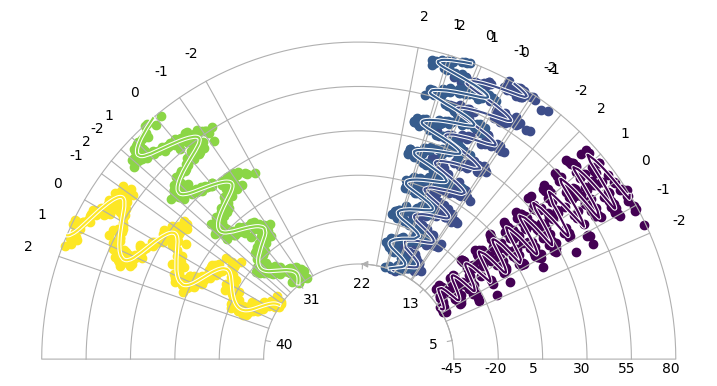

In [8]:
#display the plot
fig = lstein.draw(LSC, figsize=(9,9))
fig.show()

### Convenience Usage

In [9]:
#add data to plot (automatically generates panels for you)
LSC.plot(theta_raw, x_raw, y_raw, seriestype="scatter")
LSC.plot(theta_pro, x_pro, y_pro, seriestype="line", series_kwargs=dict(c="w", lw=3))   #white outline to make discernable from scatter
LSC.plot(theta_pro, x_pro, y_pro, seriestype="line")

/tmp/ipykernel_436572/1636926589.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


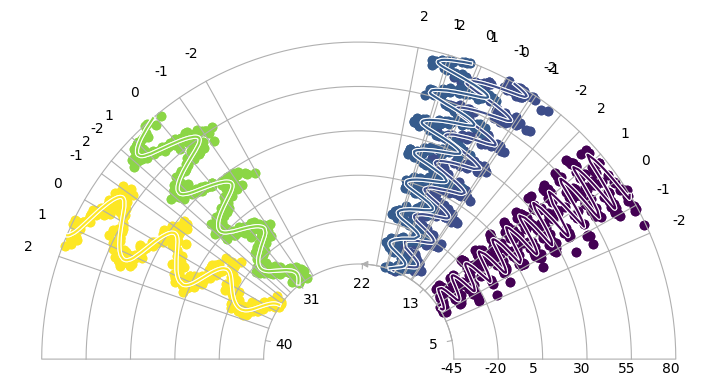

In [10]:
#display the plot
fig = lstein.draw(LSC, figsize=(9,9))
fig.show()